# A dive into India's smog crisis

The Air Quality Index (AQI) is the Environmental Protection Agency's index for reporting air quality. A value close to 0 signals little to no public health concern, while higher values are associated with increased risk to public health.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium

In [2]:
city_db = pd.read_csv('city_day.csv')

In [3]:
city_db.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
city_db.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


![aqi thresholds](https://user-images.githubusercontent.com/91218998/226107225-4e78b162-7844-43d9-88c4-17caf21f76da.png)

### Brief Ananlysis of Air Quality Data.

The dataset contains the air quality Data for major cities in India. It displays air quality from 2015 to 2020, with a minimum of 13 and a maximum of 2049. The average AQI for the entire country over this period is **166**. 

In [5]:
city_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [6]:
city_db.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [7]:
city_db.describe().loc["mean"]

PM2.5       67.450578
PM10       118.127103
NO          17.574730
NO2         28.560659
NOx         32.309123
NH3         23.483476
CO           2.248598
SO2         14.531977
O3          34.491430
Benzene      3.280840
Toluene      8.700972
Xylene       3.070128
AQI        166.463581
Name: mean, dtype: float64

In [8]:
city_db = city_db.replace({

"PM2.5" : {np.nan:67.450578},
"PM10" :{np.nan:118.127103},
"NO": {np.nan:17.57473},
"NO2": {np.nan:28.560659},
"NOx": {np.nan:32.309123},
"NH3": {np.nan:23.483476},
"CO":  {np.nan:2.248598},
"SO2": {np.nan:14.531977},
"O3": {np.nan:34.49143},
"Benzene":  {np.nan:3.28084},
"Toluene": {np.nan:8.700972},
"Xylene":  {np.nan:3.070128}})
city_db.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI           4681
AQI_Bucket    4681
dtype: int64

In [9]:
city_db = city_db.dropna(subset = ['AQI'], axis = 0)
city_db.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [10]:
city_db['Date']=pd.to_datetime(city_db['Date'])

In [11]:
yearly=city_db[['Date', 'AQI']].groupby(city_db['Date'].dt.year).mean()
yearly

,Date,AQI
Date,,
2015,2015-08-01 02:16:21.280787968,212.463054
2016,2016-07-12 02:27:44.982510848,197.150019
2017,2017-07-17 10:22:55.881261568,181.472789
2018,2018-07-07 20:52:49.811320576,182.684312
2019,2019-07-09 07:02:09.826050048,156.518173
2020,2020-04-02 04:55:06.039357696,113.520697


Text(0, 0.5, 'AQI')

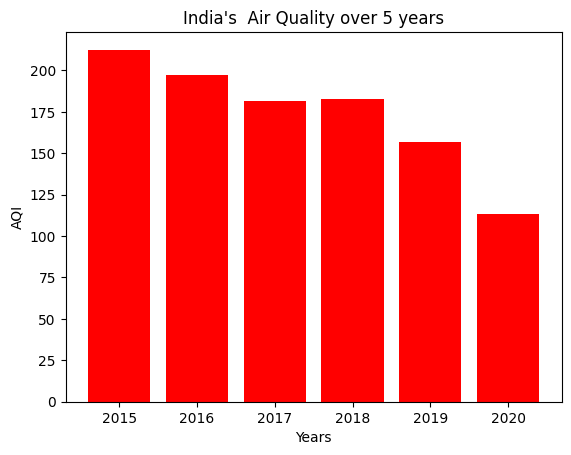

In [12]:
plt.bar(  yearly.index , yearly['AQI'], color = 'Red')
plt.title("India's  Air Quality over 5 years")
plt.xlabel('Years')
plt.ylabel('AQI')

From the above analysis we can observe that 2015 had the worst AQI in all years, with an average of *212*. While, 2020 had the best air quality due to the Covid - 19 lockdowns. 

In [13]:
city_wise=city_db[['City', 'AQI']].groupby(city_db['City'])['AQI'].median()
city_wise

City
Ahmedabad             384.5
Aizawl                 23.0
Amaravati              78.0
Amritsar              101.0
Bengaluru              86.0
Bhopal                120.0
Brajrajnagar          122.0
Chandigarh             82.0
Chennai               100.0
Coimbatore             75.0
Delhi                 257.0
Ernakulam              94.0
Gurugram              208.0
Guwahati               98.0
Hyderabad             104.0
Jaipur                122.0
Jorapokhar            133.0
Kochi                  99.0
Kolkata                94.0
Lucknow               198.0
Mumbai                 91.0
Patna                 215.0
Shillong               48.0
Talcher               128.5
Thiruvananthapuram     68.0
Visakhapatnam         106.0
Name: AQI, dtype: float64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, 'Ahmedabad'),
  Text(1, 0, 'Aizawl'),
  Text(2, 0, 'Amaravati'),
  Text(3, 0, 'Amritsar'),
  Text(4, 0, 'Bengaluru'),
  Text(5, 0, 'Bhopal'),
  Text(6, 0, 'Brajrajnagar'),
  Text(7, 0, 'Chandigarh'),
  Text(8, 0, 'Chennai'),
  Text(9, 0, 'Coimbatore'),
  Text(10, 0, 'Delhi'),
  Text(11, 0, 'Ernakulam'),
  Text(12, 0, 'Gurugram'),
  Text(13, 0, 'Guwahati'),
  Text(14, 0, 'Hyderabad'),
  Text(15, 0, 'Jaipur'),
  Text(16, 0, 'Jorapokhar'),
  Text(17, 0, 'Kochi'),
  Text(18, 0, 'Kolkata'),
  Text(19, 0, 'Lucknow'),
  Text(20, 0, 'Mumbai'),
  Text(21, 0, 'Patna'),
  Text(22, 0, 'Shillong'),
  Text(23, 0, 'Talcher'),
  Text(24, 0, 'Thiruvananthapuram'),
  Text(25, 0, 'Visakhapatnam')])

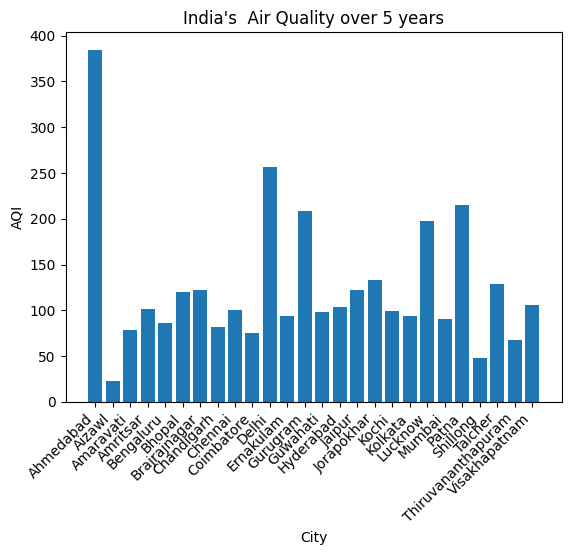

In [14]:
plt.bar(  city_wise.index , city_wise)
plt.title("India's  Air Quality over 5 years")
plt.xlabel('City')
plt.ylabel('AQI')
plt.xticks(rotation=45, horizontalalignment='right')

We observe the most polluted city in India is **Ahmedabad**, followed by **Delhi** and **Patna**.

In [15]:
monthly=city_db[['Date', 'AQI']].groupby(city_db['Date'].dt.strftime('%b'), sort = False).mean()
monthly

,Date,AQI
Date,,
Jan,2018-08-16 20:01:54.339093760,231.674918
Feb,2018-09-16 12:54:03.118383104,202.905197
Mar,2018-09-10 07:34:12.943704320,164.735281
Apr,2018-08-28 03:32:04.705882368,143.355120
May,2018-10-03 07:48:25.598692096,135.489579
Jun,2018-10-30 15:31:19.863481088,120.198379
Jul,2018-03-13 13:44:18.823529472,111.854575
Aug,2018-03-24 12:16:12.972972800,113.613176
Sep,2018-04-25 15:12:11.474103552,115.191804


Text(0, 0.5, 'AQI')

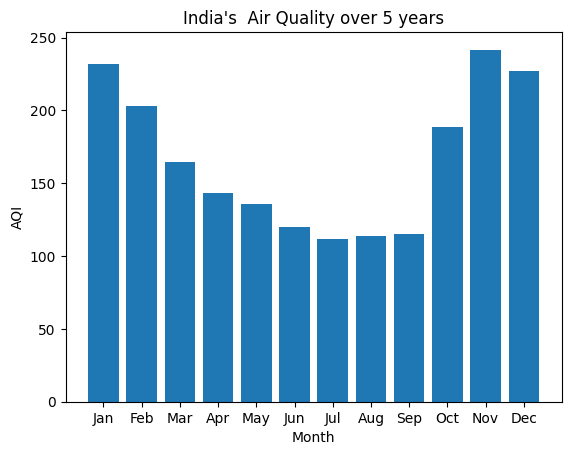

In [16]:
plt.bar(  monthly.index , monthly['AQI'])
plt.title("India's  Air Quality over 5 years")
plt.xlabel('Month')
plt.ylabel('AQI')

We observe that the worst month in the year is **November** and the AQI is the least in **July**. While, the pollution increases during winter and decreases during monsoon. 

During winter, pollution levels tend to increase in India due to a combination of factors. Cold air near the ground gets trapped under a layer of warmer air, preventing pollutants from dispersing. Many cities in northern India are situated in valleys or basins, where pollutants get trapped, exacerbating air quality issues. Industrial emissions, vehicular pollution, and seasonal factors like crop residue burning contribute to the winter pollution crisis.

In [17]:
Ahmedabad_db = city_db[city_db['City'] == 'Ahmedabad']
Delhi_db=city_db[city_db['City'] == 'Delhi']
Gurugram_db = city_db[city_db['City'] == 'Gurugram']
Lucknow_db=city_db[city_db['City'] == 'Lucknow']
Patna_db = city_db[city_db['City'] == 'Patna']

In [18]:
monthAhm=Ahmedabad_db[['Date', 'AQI']].groupby(Ahmedabad_db['Date'].dt.strftime('%b'), sort = False).mean()
monthDl=Delhi_db[['Date', 'AQI']].groupby(Delhi_db['Date'].dt.strftime('%b'), sort = False).mean()

Text(0, 0.5, 'AQI')

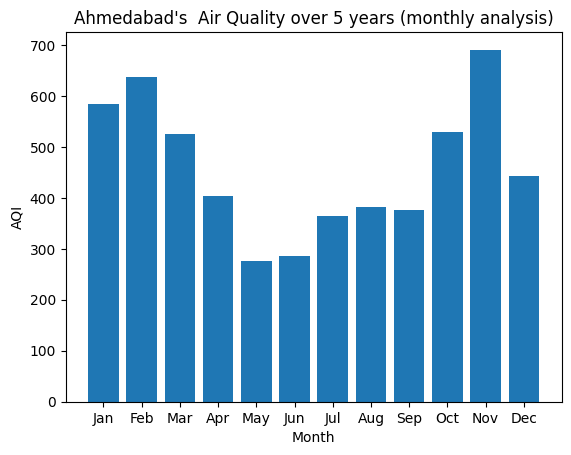

In [19]:
plt.bar(  monthAhm.index , monthAhm['AQI'])
plt.title("Ahmedabad's  Air Quality over 5 years (monthly analysis)")
plt.xlabel('Month')
plt.ylabel('AQI')

We can observe that over the past 5 years, November had the worst AQI in Ahemdabad, with February giving strong competition.

As we can see from the usual pollution trends, colder months tend to have a higher level of AQI due to the concept "Cold air settles down".

Text(0, 0.5, 'AQI')

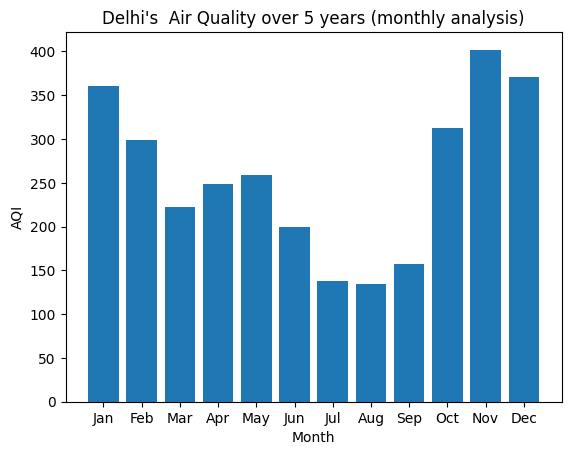

In [20]:
plt.bar(  monthDl.index , monthDl['AQI'])
plt.title("Delhi's  Air Quality over 5 years (monthly analysis)")
plt.xlabel('Month')
plt.ylabel('AQI')

Delhi, known as the pollution capital showed high level of AQI during the cold months of November, December and January.

In [21]:
yearlyAhm=Ahmedabad_db[['Date', 'AQI','PM2.5', 'PM10','NO2']].groupby(city_db['Date'].dt.year).mean()
yearlyDel=Delhi_db[['Date', 'AQI','PM2.5', 'PM10','NO2']].groupby(city_db['Date'].dt.year).mean()
yearlyGur=Gurugram_db[['Date', 'AQI','PM2.5', 'PM10','NO2']].groupby(city_db['Date'].dt.year).mean()
yearlyluk=Lucknow_db[['Date', 'AQI','PM2.5', 'PM10','NO2']].groupby(city_db['Date'].dt.year).mean()
yearlyPat=Patna_db[['Date', 'AQI','PM2.5', 'PM10','NO2']].groupby(city_db['Date'].dt.year).mean()

Text(0, 0.5, 'AQI')

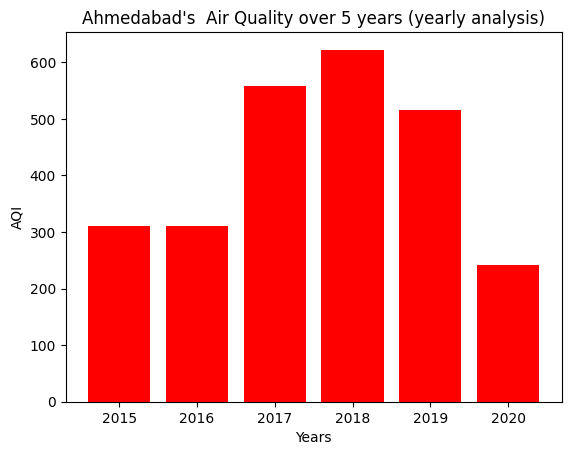

In [22]:
plt.bar(  yearlyAhm.index , yearlyAhm['AQI'], color = 'Red')
plt.title("Ahmedabad's  Air Quality over 5 years (yearly analysis)")
plt.xlabel('Years')
plt.ylabel('AQI')

2018 had the highest level of AQI, with the levels touching the 600 mark. While the AQI level of 2020 dropped down to below 300, the reason being the COVID-19 lockdown which certainly was a blessing for the planet Earth.

Text(0, 0.5, 'AQI')

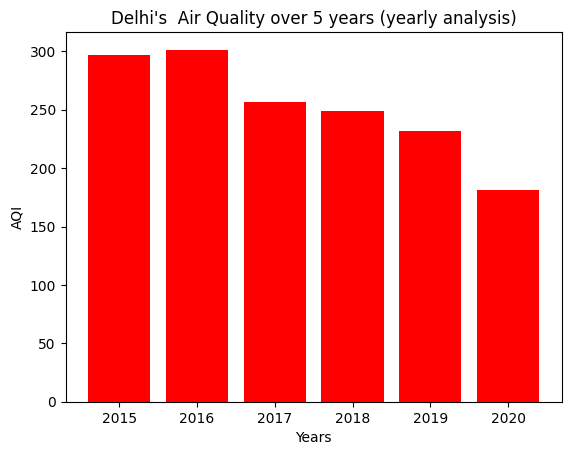

In [23]:
plt.bar(  yearlyDel.index , yearlyDel['AQI'], color = 'Red')
plt.title("Delhi's  Air Quality over 5 years (yearly analysis)")
plt.xlabel('Years')
plt.ylabel('AQI')

Delhi's AQI peaked in 2016 with touching the 300 mark. While, it showed similar trend as Ahemdabad in 2020 with AQI dipping below 200.

Text(0, 0.5, 'AQI')

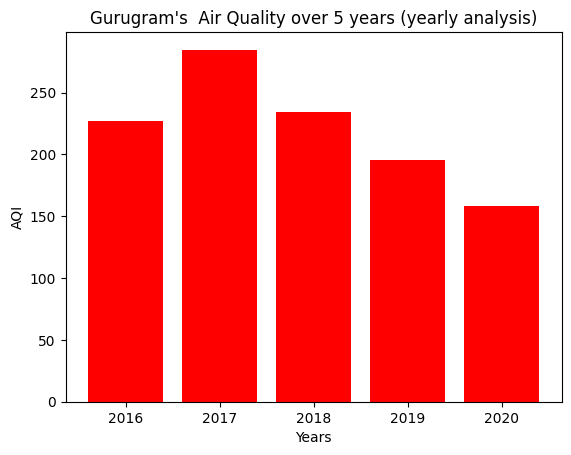

In [24]:
plt.bar(  yearlyGur.index , yearlyGur['AQI'], color = 'Red')
plt.title("Gurugram's  Air Quality over 5 years (yearly analysis)")
plt.xlabel('Years')
plt.ylabel('AQI')

Gurugram's AQI peaked in 2018 with the levels going above 250. While, the dip happened in 2020 with the AQI levels reaching down to 150.

Text(0, 0.5, 'AQI')

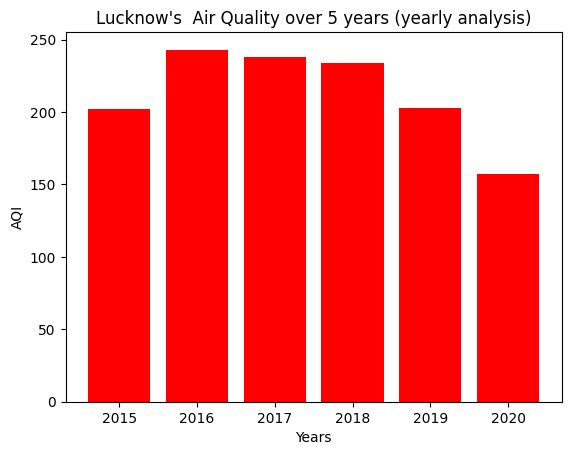

In [25]:
plt.bar(  yearlyluk.index , yearlyluk['AQI'], color = 'Red')
plt.title("Lucknow's  Air Quality over 5 years (yearly analysis)")
plt.xlabel('Years')
plt.ylabel('AQI')

The AQI levels peaked to 250 in the year 2016 in Lucknow and dipped to 150 in the year 2020.

Text(0, 0.5, 'AQI')

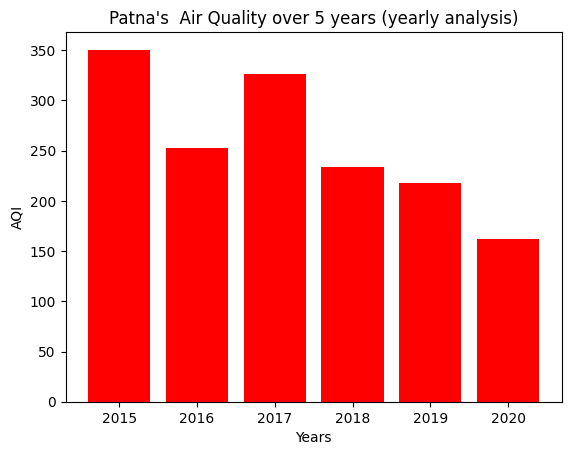

In [26]:
plt.bar(  yearlyPat.index , yearlyPat['AQI'], color = 'Red')
plt.title("Patna's  Air Quality over 5 years (yearly analysis)")
plt.xlabel('Years')
plt.ylabel('AQI')

Patna's AQI peaked in 2015 with the levels reaching the 350 mark. Same as other states the AQI dipped to 150 in 2020.

In [27]:
gasses_db = pd.read_csv('station_day.csv')

In [28]:
gasses_corr = gasses_db.corr(numeric_only = True)
gasses_corr

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
PM2.5,1.000000,0.858750,0.476948,0.445639,0.470342,0.428569,0.094220,0.195771,0.133021,0.118491,0.291305,0.080884,0.814845
PM10,0.858750,1.000000,0.512584,0.487891,0.521199,0.484385,0.216346,0.277418,0.044404,0.110385,0.333021,0.043179,0.885070
NO,0.476948,0.512584,1.000000,0.577518,0.865261,0.332881,0.123918,0.190461,0.019317,0.148848,0.280558,0.050431,0.476714
NO2,0.445639,0.487891,0.577518,1.000000,0.721196,0.388384,0.176172,0.289192,0.223971,0.118302,0.302385,0.217948,0.499207
NOx,0.470342,0.521199,0.865261,0.721196,1.000000,0.348228,0.130189,0.230971,0.101440,0.156820,0.269347,0.093530,0.498363
NH3,0.428569,0.484385,0.332881,0.388384,0.348228,1.000000,0.179387,0.110722,0.126337,0.051289,0.233280,0.020078,0.440643
CO,0.094220,0.216346,0.123918,0.176172,0.130189,0.179387,1.000000,0.371101,0.009479,0.052970,0.110304,0.123554,0.448148
SO2,0.195771,0.277418,0.190461,0.289192,0.230971,0.110722,0.371101,1.000000,0.134844,0.057793,0.211878,0.213387,0.393349
O3,0.133021,0.044404,0.019317,0.223971,0.101440,0.126337,0.009479,0.134844,1.000000,0.000773,0.079344,0.072972,0.175122
Benzene,0.118491,0.110385,0.148848,0.118302,0.156820,0.051289,0.052970,0.057793,0.000773,1.000000,0.496211,0.225983,0.116805


Text(0.5, 1.0, 'Various Gasseous pollutants ratio correlation')

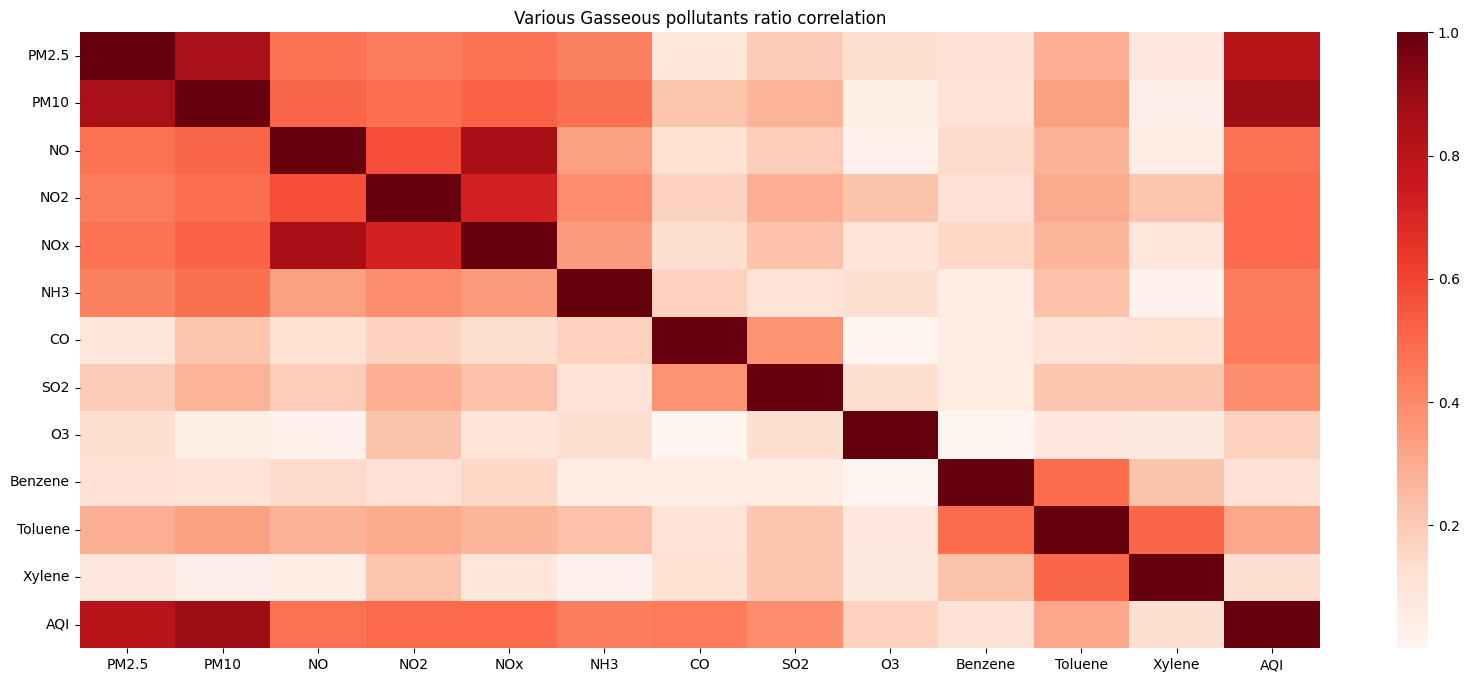

In [29]:
plt.figure(figsize=(20,8))
sns.heatmap(gasses_corr, cmap = 'Reds')
plt.title('Various Gasseous pollutants ratio correlation')

Darker the shade, deadlier the gas. 

In [30]:
gasses_yearly = city_db.drop(['City','AQI_Bucket'], axis = 1)
gasses_yearly = gasses_yearly.groupby(gasses_yearly['Date'].dt.year).mean()
gasses_yearly

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,,,,,,,,,,,,,,
2015,2015-08-01 02:16:21.280787968,82.634807,137.152950,16.869050,24.581216,34.424268,32.765379,4.747349,12.079849,34.689089,4.045784,8.833512,2.888977,212.463054
2016,2016-07-12 02:27:44.982510848,92.291496,130.990775,19.794945,31.926688,31.205470,31.691537,2.102455,10.162012,38.558726,2.728388,6.654018,2.668255,197.150019
2017,2017-07-17 10:22:55.881261568,85.295571,126.062454,17.932219,32.431393,27.220014,28.531108,1.549754,12.148952,35.101596,2.169471,5.997704,3.446405,181.472789
2018,2018-07-07 20:52:49.811320576,69.675211,128.984676,18.833113,33.587263,36.296544,22.744616,3.108906,17.799073,35.291934,2.845434,10.882805,3.857813,182.684312
2019,2019-07-09 07:02:09.826050048,59.242970,113.932910,16.477055,28.889794,33.609608,19.927583,2.291027,16.277231,33.425858,3.330011,10.335204,3.431263,156.518173
2020,2020-04-02 04:55:06.039357696,44.053959,90.939079,16.702954,20.691263,28.452841,19.333767,1.164149,11.883400,34.556137,5.441676,9.925232,2.617894,113.520697


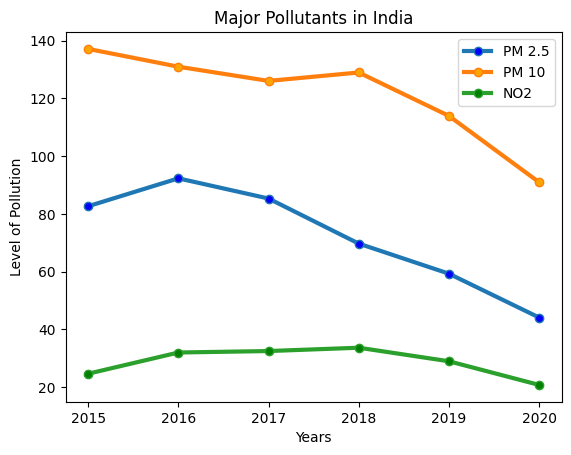

In [31]:
plt.plot(gasses_yearly.index, gasses_yearly['PM2.5'], label = 'PM 2.5', marker='o', markerfacecolor='blue', linewidth = 3)
plt.plot(gasses_yearly.index, gasses_yearly['PM10'], label = 'PM 10', marker='o', markerfacecolor='orange', linewidth = 3)
plt.plot(gasses_yearly.index, gasses_yearly['NO2'], label = 'NO2', marker='o', markerfacecolor='green', linewidth = 3)
plt.title('Major Pollutants in India')
plt.xlabel('Years')
plt.ylabel('Level of Pollution')
plt.legend()

The three primary pollutants in Indian cities and states are PM 2.5, PM 10, and NO2. While NO2 levels have remained steady over the years, PM 2.5 and PM 10 levels have shown a declining trend.

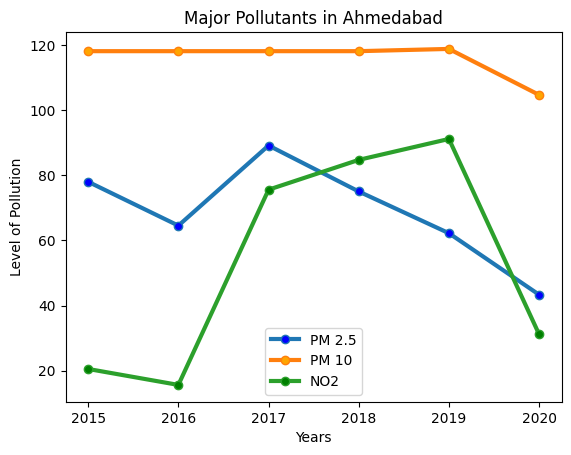

In [32]:
plt.plot(yearlyAhm.index, yearlyAhm['PM2.5'], label = 'PM 2.5', marker='o', markerfacecolor='blue', linewidth = 3)
plt.plot(yearlyAhm.index, yearlyAhm['PM10'], label = 'PM 10', marker='o', markerfacecolor='orange', linewidth = 3)
plt.plot(yearlyAhm.index, yearlyAhm['NO2'], label = 'NO2', marker='o', markerfacecolor='green', linewidth = 3)
plt.title('Major Pollutants in Ahmedabad')
plt.xlabel('Years')
plt.ylabel('Level of Pollution')
plt.legend()

The graph shows trends in major pollutants in Ahmedabad from 2016 to 2020. NO2 levels exhibited a dramatic fluctuation over several years. In 2016, there was a slight decrease, but this was followed by a sharp increase in 2017, with levels spiking to 80. From 2017 to 2019, NO2 levels continued to rise steadily. However, in 2020, there was a significant decline in NO2 levels, primarily due to the COVID-19 lockdown, which led to reduced industrial activity and vehicular emissions.
PM 2.5 levels peaked in 2017 before experiencing a decline in 2020. While PM 10 levels maintained a steady streak at 120 and declined to 100 in 2020.

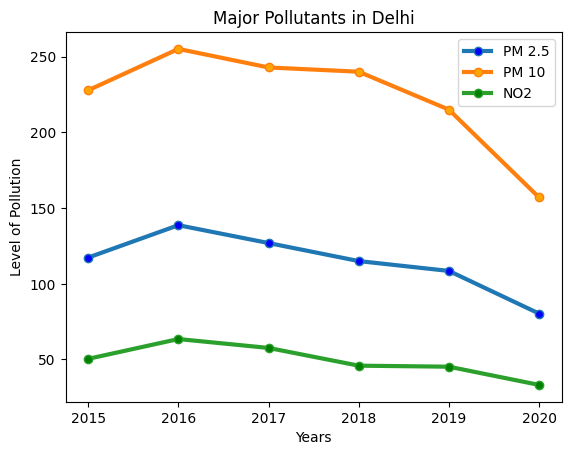

In [33]:
plt.plot(yearlyDel.index, yearlyDel['PM2.5'], label = 'PM 2.5', marker='o', markerfacecolor='blue', linewidth = 3)
plt.plot(yearlyDel.index, yearlyDel['PM10'], label = 'PM 10', marker='o', markerfacecolor='orange', linewidth = 3)
plt.plot(yearlyDel.index, yearlyDel['NO2'], label = 'NO2', marker='o', markerfacecolor='green', linewidth = 3)
plt.title('Major Pollutants in Delhi')
plt.xlabel('Years')
plt.ylabel('Level of Pollution')
plt.legend()

The graph shows trends in major pollutants in Delhi from 2016 to 2020.NO2 levels have remained consistent over the years but saw a decline in 2020. In 2016, there was a slight increase in NO2, PM10, and PM2.5 pollutants, followed by a slight decrease in 2017. In 2020, all three pollutant levels declined, primarily due to the COVID-19 lockdown, which resulted in reduced industrial activity and vehicular emissions.

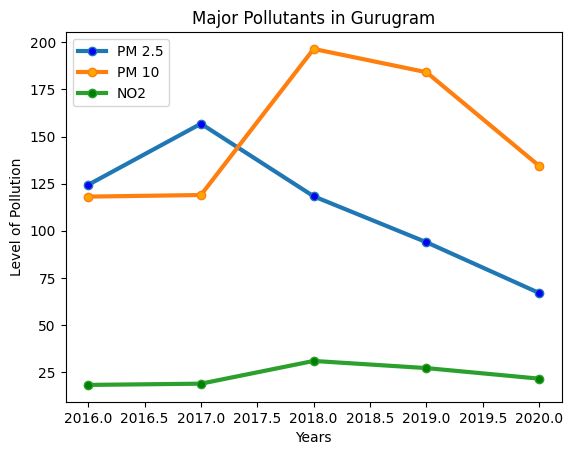

In [34]:
plt.plot(yearlyGur.index, yearlyGur['PM2.5'], label = 'PM 2.5', marker='o', markerfacecolor='blue', linewidth = 3)
plt.plot(yearlyGur.index, yearlyGur['PM10'], label = 'PM 10', marker='o', markerfacecolor='orange', linewidth = 3)
plt.plot(yearlyGur.index, yearlyGur['NO2'], label = 'NO2', marker='o', markerfacecolor='green', linewidth = 3)
plt.title('Major Pollutants in Gurugram')
plt.xlabel('Years')
plt.ylabel('Level of Pollution')
plt.legend()

The graph shows trends in major pollutants in Gurugram from 2016 to 2020. PM10 and PM2.5 levels increased sharply in 2017 and 2018, respectively, but both declined significantly by 2020. NO2 levels remained relatively stable with a slight increase in 2018, followed by a decline in 2020, likely due to reduced industrial activities and vehicular emissions during the COVID-19 lockdown.

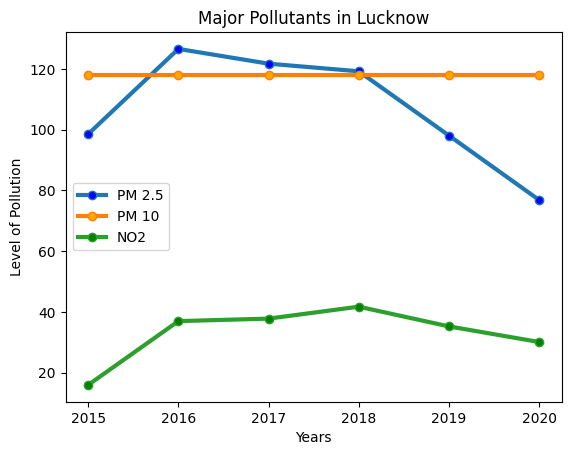

In [35]:
plt.plot(yearlyluk.index, yearlyluk['PM2.5'], label = 'PM 2.5', marker='o', markerfacecolor='blue', linewidth = 3)
plt.plot(yearlyluk.index, yearlyluk['PM10'], label = 'PM 10', marker='o', markerfacecolor='orange', linewidth = 3)
plt.plot(yearlyluk.index, yearlyluk['NO2'], label = 'NO2', marker='o', markerfacecolor='green', linewidth = 3)
plt.title('Major Pollutants in Lucknow')
plt.xlabel('Years')
plt.ylabel('Level of Pollution')
plt.legend()

The graph illustrates the trends of major pollutants in Lucknow from 2015 to 2020. PM10 levels remained stable throughout the period, while PM2.5 levels peaked in 2016 and then gradually decreased, with a notable decline in 2020. NO2 levels showed a slight increase until 2018, followed by a gradual decrease, reaching the lowest point in 2020, likely due to reduced activities during the COVID-19 lockdown.

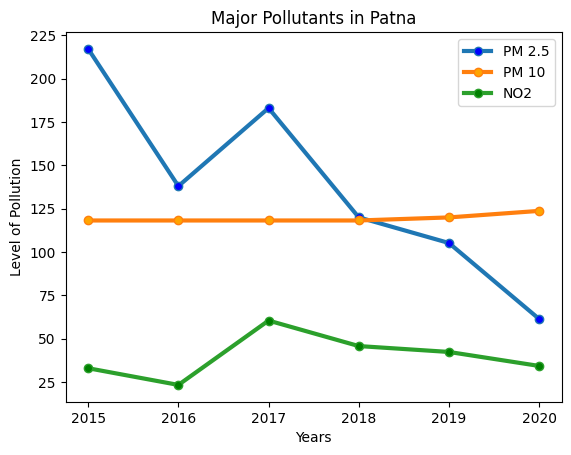

In [36]:
plt.plot(yearlyPat.index, yearlyPat['PM2.5'], label = 'PM 2.5', marker='o', markerfacecolor='blue', linewidth = 3)
plt.plot(yearlyPat.index, yearlyPat['PM10'], label = 'PM 10', marker='o', markerfacecolor='orange', linewidth = 3)
plt.plot(yearlyPat.index, yearlyPat['NO2'], label = 'NO2', marker='o', markerfacecolor='green', linewidth = 3)
plt.title('Major Pollutants in Patna')
plt.xlabel('Years')
plt.ylabel('Level of Pollution')
plt.legend()

The graph shows trends in major pollutants in Patna from 2015 to 2020. PM2.5 levels were very high in 2015 but significantly dropped by 2020. PM10 levels remained relatively stable throughout the period. NO2 levels saw a peak in 2017, followed by a gradual decline, reaching their lowest point in 2020, likely influenced by reduced industrial and vehicular activities during the COVID-19 lockdown.